

## Current GMV & Predictions


In [1]:
import statistics
import seaborn as s
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
s.set_theme(style="whitegrid")

plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
s.set()
%matplotlib inline

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
df_orders = pd.read_csv("./data/olist_orders_dataset.csv")
df_order_items = pd.read_csv("./data/olist_order_items_dataset.csv")

df_products = pd.read_csv("./data/olist_products_dataset.csv")
df_category = pd.read_csv("./data/product_category_name_translation.csv")
df_products_cat_eng = pd.read_csv("./data/product_category_name_translation.csv")


df_sellers = pd.read_csv("./data/olist_sellers_dataset.csv")

df_order_pay = pd.read_csv("./data/olist_order_payments_dataset.csv")
df_customers = pd.read_csv("./data/olist_customers_dataset.csv")


df_reviews = pd.read_csv("./data/olist_order_reviews_dataset.csv")
df_geolocation = pd.read_csv("./data/olist_geolocation_dataset.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## GMV Prediction (Linear Regression  & Gaussian Process Regression)


### Linear Regression

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression



def get_linear_regression_analysis(df_selected):
    df =  df_selected.groupby(['order_month', 'order_year', ])['order_price_total'].sum().to_frame().reset_index()
    df = df.sort_values(by=["order_year", "order_month"], ascending=True)

    x = []
    y = []
    for index, row in df.iterrows():
        x.append([row['order_month'], row['order_year']])
        y.append(row['order_price_total'])

    x, y = np.array(x), np.array(y)
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    print('slope:', model.coef_)

    y_pred = model.predict(x)
    print('predicted response:', y_pred, sep='\n')


    x_pred1 = [[6.0, 2018], [7.0, 2018], [8.0, 2018], [9.0, 2018], [10.0, 2018], [11.0, 2018], [12.0, 2018]
              , [1.0, 2019], [2.0, 2019], [3.0, 2019], [4.0, 2019], [5.0, 2019], [6.0, 2019], [7.0, 2019], [8.0, 2019]]
    y_pred1 = model.predict(x_pred1)
    y_pred1


    # GMV Analysis

    df = pd.DataFrame({"y":y, "y_pred":y_pred, "x": [str(int(e[0])) + "-" + str(int(e[1]))  for e in x]})
    df_pred1 = pd.DataFrame({"y_pred1":y_pred1, "x_pred1": [str(int(e[0])) + "-" + str(int(e[1]))  for e in x_pred1]})

    plt.figure(figsize=(25,15))
    s.lineplot(x='x',y='y', data=df, label="actual_data (y)", color="green")
    s.lineplot(x='x', y='y_pred', data=df, label="historic_data_validation (y_pred)", color="blue")
    s.lineplot(x='x_pred1', y='y_pred1', data=df_pred1, label="extended_prediction (y_pred1)", color="black")
    plt.title("Monthly GMV of 1st-Top-Seller",fontweight='bold')


    # previous data vs next 12 months

    plt.figure(figsize=(25,15))
    s.lineplot(x='x',y='y', data=df, label="actual_data (y)", color="green")
    s.lineplot(x='x_pred1', y='y_pred1', data=df_pred1, label="extended_prediction (y_pred1)", color="black")
    plt.title("Prediction-Comparison (historic vs future)",fontweight='bold')



### Gaussian Process Regression

In [5]:
# dont's run it twice, values are dependent from above cells

import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


def get_gaussian_process_regression_analysis(df_selected):
    x = []
    y = []

    df1 =  df_selected_seller.groupby(['order_month', 'order_year', ])['order_price_total'].sum().to_frame().reset_index()
    df1 = df1.sort_values(by=["order_year", "order_month"], ascending=True)

    for index, row in df1.iterrows():
        x.append([row['order_month'], row['order_year']])
        y.append(row['order_price_total'])


    kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
    gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    gaussian_process.fit(x, y)
    # gaussian_process.kernel_

    # next 12 months
    x_pred1 = [[6.0, 2018], [7.0, 2018], [8.0, 2018], [9.0, 2018], [10.0, 2018], [11.0, 2018], [12.0, 2018]
              , [1.0, 2019], [2.0, 2019], [3.0, 2019], [4.0, 2019], [5.0, 2019], [6.0, 2019], [7.0, 2019], [8.0, 2019]]
    y_pred = gaussian_process.predict(x)
    y_pred1 = gaussian_process.predict(x_pred1)


    # General GMV Analysis
    # 1- Actual Historic Data
    # 2- Prediction Validation
    # 3- Future Predictions

    df = pd.DataFrame({"y":y, "y_pred":y_pred, "x": [str(int(e[0])) + "-" + str(int(e[1]))  for e in x]})
    df_pred1 = pd.DataFrame({"y_pred1":y_pred1, "x_pred1": [str(int(e[0])) + "-" + str(int(e[1]))  for e in x_pred1]})

    plt.figure(figsize=(25,15))
    s.lineplot(x='x',y='y', data=df, label="actual_data (y)", color="green")
    s.lineplot(x='x', y='y_pred', data=df, label="historic_data_validation (y_pred)", color="blue")
    s.lineplot(x='x_pred1', y='y_pred1', data=df_pred1, label="extended_prediction (y_pred1)", color="black")
    plt.title("GMV Analysis for 1st-Top-Seller (Historic + Validation + Future)",fontweight='bold')


    # Monthly GMV (historic vs next 12 months)
    plt.figure(figsize=(25,15))
    s.lineplot(x='x',y='y', data=df, label="actual_data (y)", color="green")
    s.lineplot(x='x_pred1', y='y_pred1', data=df_pred1, label="extended_prediction (y_pred1)", color="black")
    plt.title("GMV Analysis for 1st-Top-Seller (Historic vs Future)",fontweight='bold')



In [6]:
# Merge Datasets

_total_orders=pd.merge(df_orders, df_order_items)
_product_orders=pd.merge(_total_orders, df_products, on="product_id")
df_seller_orders = pd.merge(_product_orders, df_sellers, on="seller_id")

df_seller_orders

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,1,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0,9350,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,1,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,construcao_ferramentas_iluminacao,40.0,516.0,2.0,750.0,30.0,28.0,28.0,13660,porto ferreira,SP
112646,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30 00:00:00,1,241a1ffc9cf969b27de6e72301020268,8501d82f68d23148b6d78bb7c4a42037,2017-03-16 19:51:36,19.70,10.96,automotivo,48.0,260.0,2.0,400.0,16.0,4.0,11.0,89031,blumenau,SC
112647,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,1,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.00,45.07,moveis_decoracao,43.0,729.0,2.0,2100.0,80.0,8.0,30.0,13478,americana,SP
112648,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,1,6e1c2008dea1929b9b6c27fa01381e90,edf3fabebcc20f7463cc9c53da932ea8,2018-05-28 21:31:24,219.90,24.12,moveis_decoracao,19.0,531.0,1.0,5900.0,41.0,21.0,41.0,8320,sao paulo,SP


In [7]:
# Top 3 Sellers
print(df_seller_orders['seller_id'].value_counts()[:3].keys())

_1seller_id = '6560211a19b47992c3666cc44a7e94c0'
_2seller_id = '4a3ca9315b744ce9f8e9374361493884'
_3seller_id = '1f50f920176fa81dab994f9023523100'


Index(['6560211a19b47992c3666cc44a7e94c0', '4a3ca9315b744ce9f8e9374361493884',
       '1f50f920176fa81dab994f9023523100'],
      dtype='object')


In [8]:
# check null values

df_seller_orders[df_seller_orders['seller_id'] == _1seller_id].isna().sum()

order_id                         0 
customer_id                      0 
order_status                     0 
order_purchase_timestamp         0 
order_approved_at                0 
order_delivered_carrier_date     7 
order_delivered_customer_date    37
order_estimated_delivery_date    0 
order_item_id                    0 
product_id                       0 
seller_id                        0 
shipping_limit_date              0 
price                            0 
freight_value                    0 
product_category_name            0 
product_name_lenght              0 
product_description_lenght       0 
product_photos_qty               0 
product_weight_g                 0 
product_length_cm                0 
product_height_cm                0 
product_width_cm                 0 
seller_zip_code_prefix           0 
seller_city                      0 
seller_state                     0 
dtype: int64

### 1st Top Seller


In [45]:
df_selected_seller = df_seller_orders[df_seller_orders['seller_id'] == _1seller_id]

df_selected_seller['order_year'] = pd.DatetimeIndex(df_selected_seller['order_approved_at']).year
df_selected_seller['order_month'] = pd.DatetimeIndex(df_selected_seller['order_approved_at']).month
df_selected_seller['order_month_year'] = df_selected_seller['order_year'].astype(str) + "-" + df_selected_seller['order_month'].astype(str)
df_selected_seller['total_approval_hours'] = (pd.to_datetime(df_selected_seller.order_approved_at) - pd.to_datetime(df_selected_seller.order_purchase_timestamp)).astype('timedelta64[h]')

# get total order price charged
df_selected_seller['order_price_total'] = df_selected_seller['order_item_id'] * df_selected_seller['price']

# average monthly GMV (Gross Merchandise Value)
first_seller_gmv_monthly = df_selected_seller.groupby(['order_month_year'])['order_price_total'].sum()
first_seller_gmv_annual = df_selected_seller.groupby(['order_year'])['order_price_total'].sum()

# avg monthly vs annual
print("monthly avg GMV", statistics.mean(first_seller_gmv_monthly.to_list()))
print("annual avg GMV", statistics.mean(first_seller_gmv_annual.to_list()))


first_seller_gmv_annual = first_seller_gmv_annual.to_frame().reset_index().append(
    {'order_year': 'predicted_avg(2019)', 'order_price_total':statistics.mean(first_seller_gmv_annual)},
    ignore_index=True)


first_seller_gmv_annual


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

monthly avg GMV 7029.726842105263
annual avg GMV 66782.405


,order_year,order_price_total
0,2017,60807.880
1,2018,72756.930
2,predicted_avg(2019),66782.405


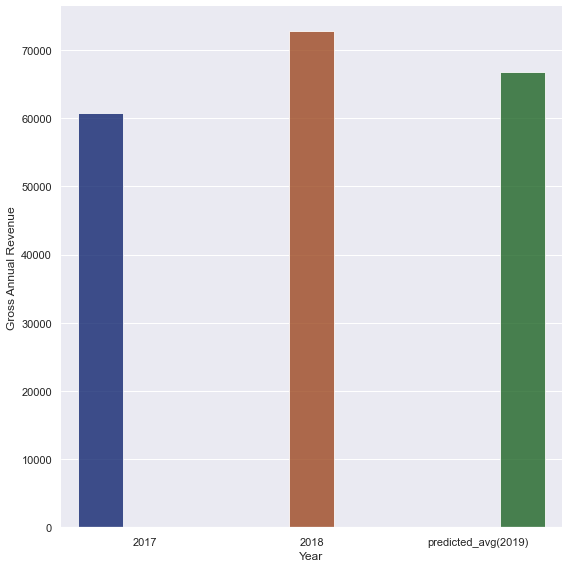

In [17]:
# Annual Revenue/ GMV

g = s.catplot(
    data=first_seller_gmv_annual, kind="bar",
    x="order_year", y="order_price_total", hue="order_year",
    ci="sd", palette="dark", alpha=.8, height=8,
    legend=False)

g.despine(left=True)
g.set_axis_labels("Year", "Gross Annual Revenue")


### Linear Regression -- Seller-1

coefficient of determination: 0.7964425408090383
intercept: -12391956.94094348
slope: [1030.51746711 6142.92082685]
predicted response:
[  375.40175538  1405.91922249  2436.43668959  3466.9541567
  4497.4716238   5527.98909091  6558.50655801  7589.02402512
  8619.54149222  9650.05895933 10680.57642644  5487.80511513
  6518.32258224  7548.84004934  8579.35751645  9609.87498355
 10640.39245066 11670.90991776 12701.42738487]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

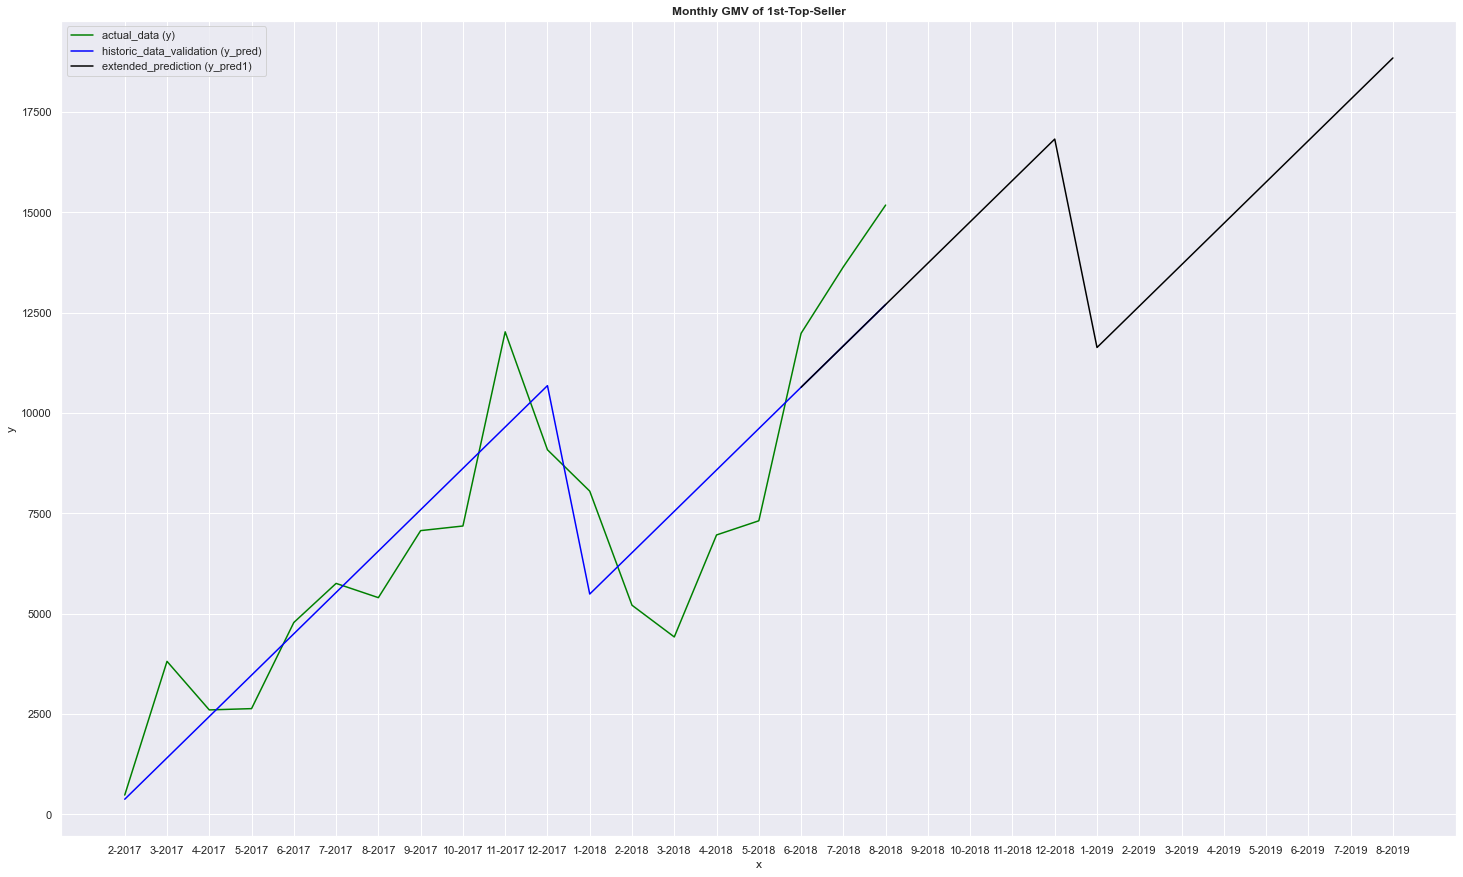

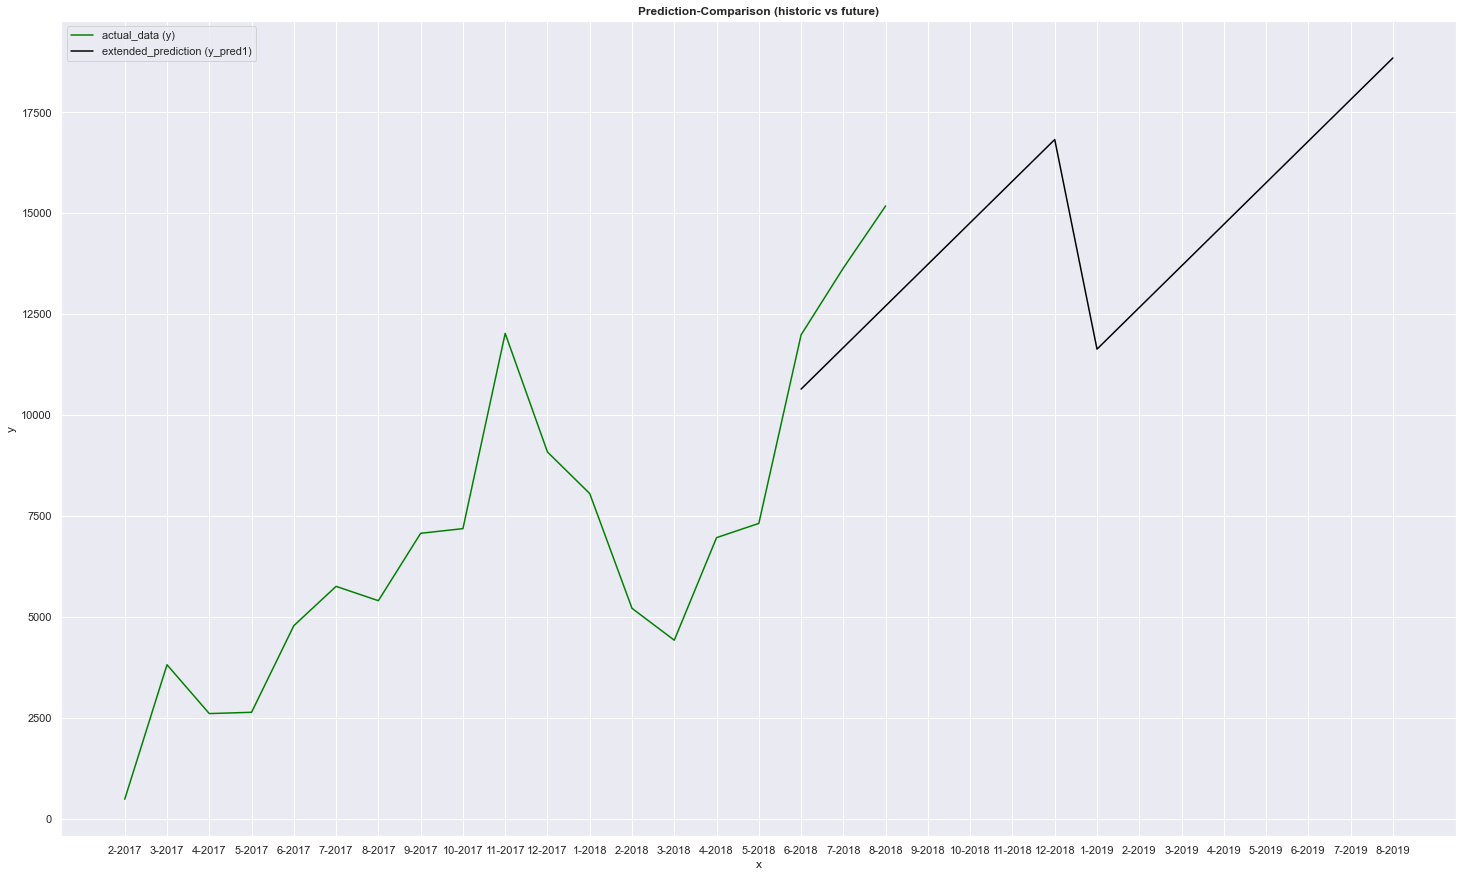

In [18]:
get_linear_regression_analysis(df_selected_seller)

### Gaussian Process Regression -- Seller-1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

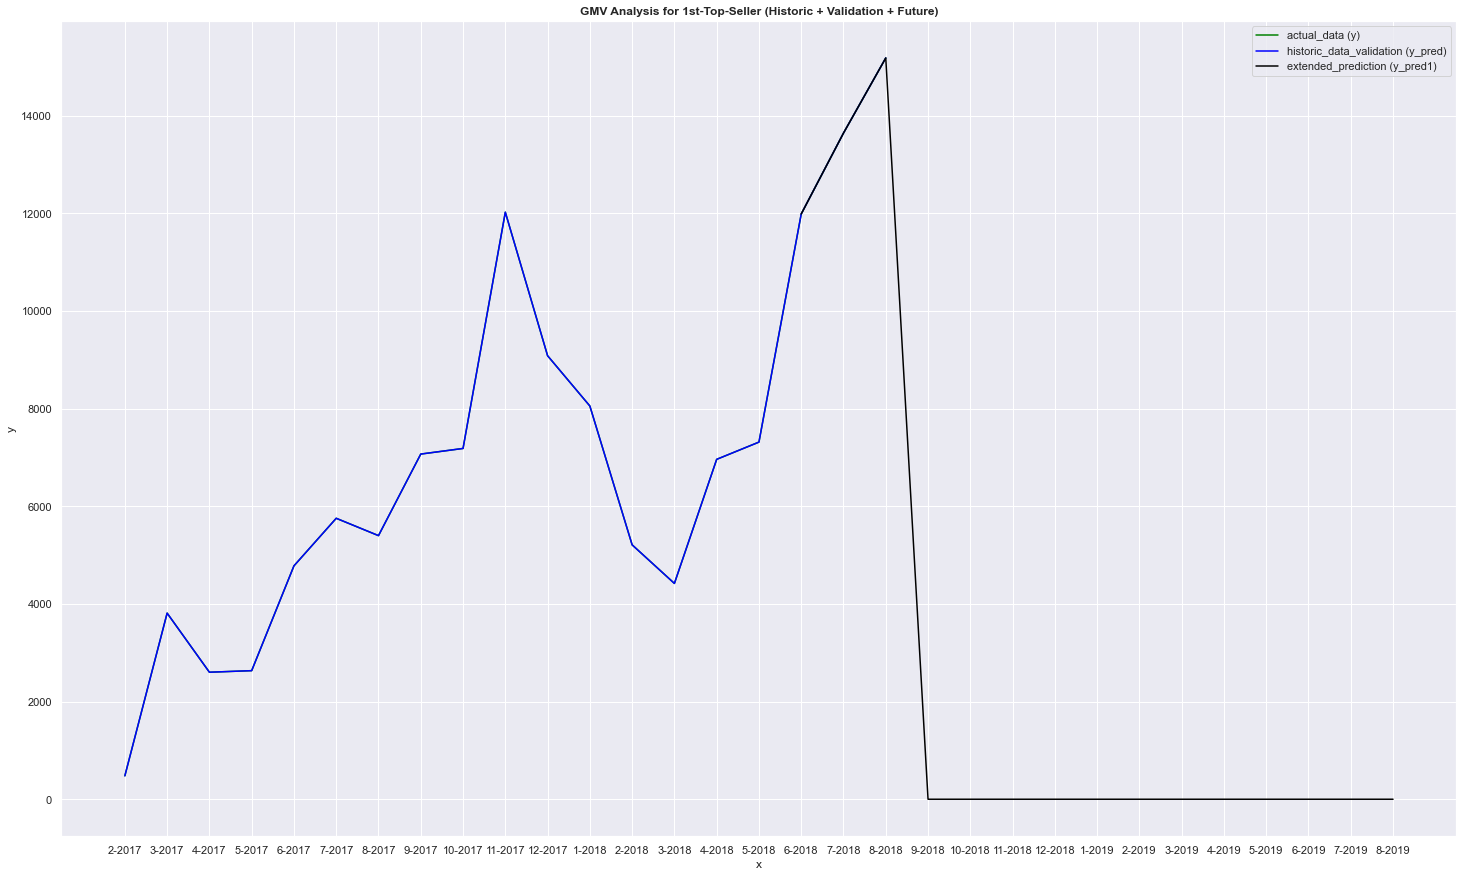

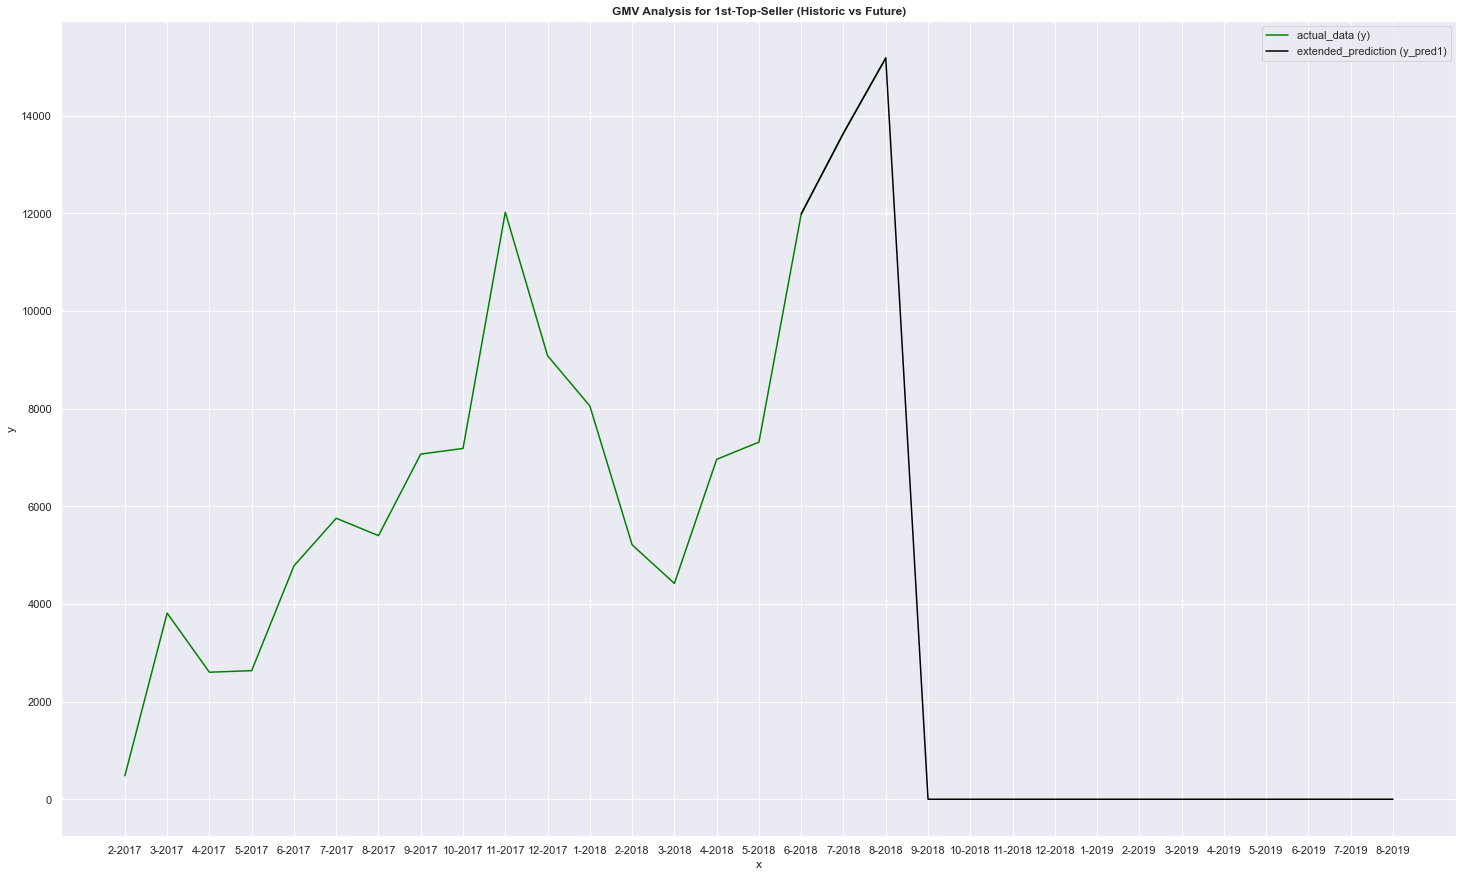

In [19]:
get_gaussian_process_regression_analysis(df_selected_seller)

In [20]:
# unique customers in any given month

_t = df_selected_seller.merge(df_order_items[df_order_items['seller_id'] == _1seller_id])
_t = _t.groupby(['order_month', 'order_year'])['customer_id'].nunique().to_frame().reset_index()
_t.sort_values(by=['order_year', 'order_month'], ascending=True)


,order_month,order_year,customer_id
1,2,2017,5
3,3,2017,51
5,4,2017,44
7,5,2017,41
9,6,2017,64
11,7,2017,78
13,8,2017,83
15,9,2017,104
16,10,2017,99
17,11,2017,166


Text(0.5, 1.0, 'Approval Time vs Sales-Volume')

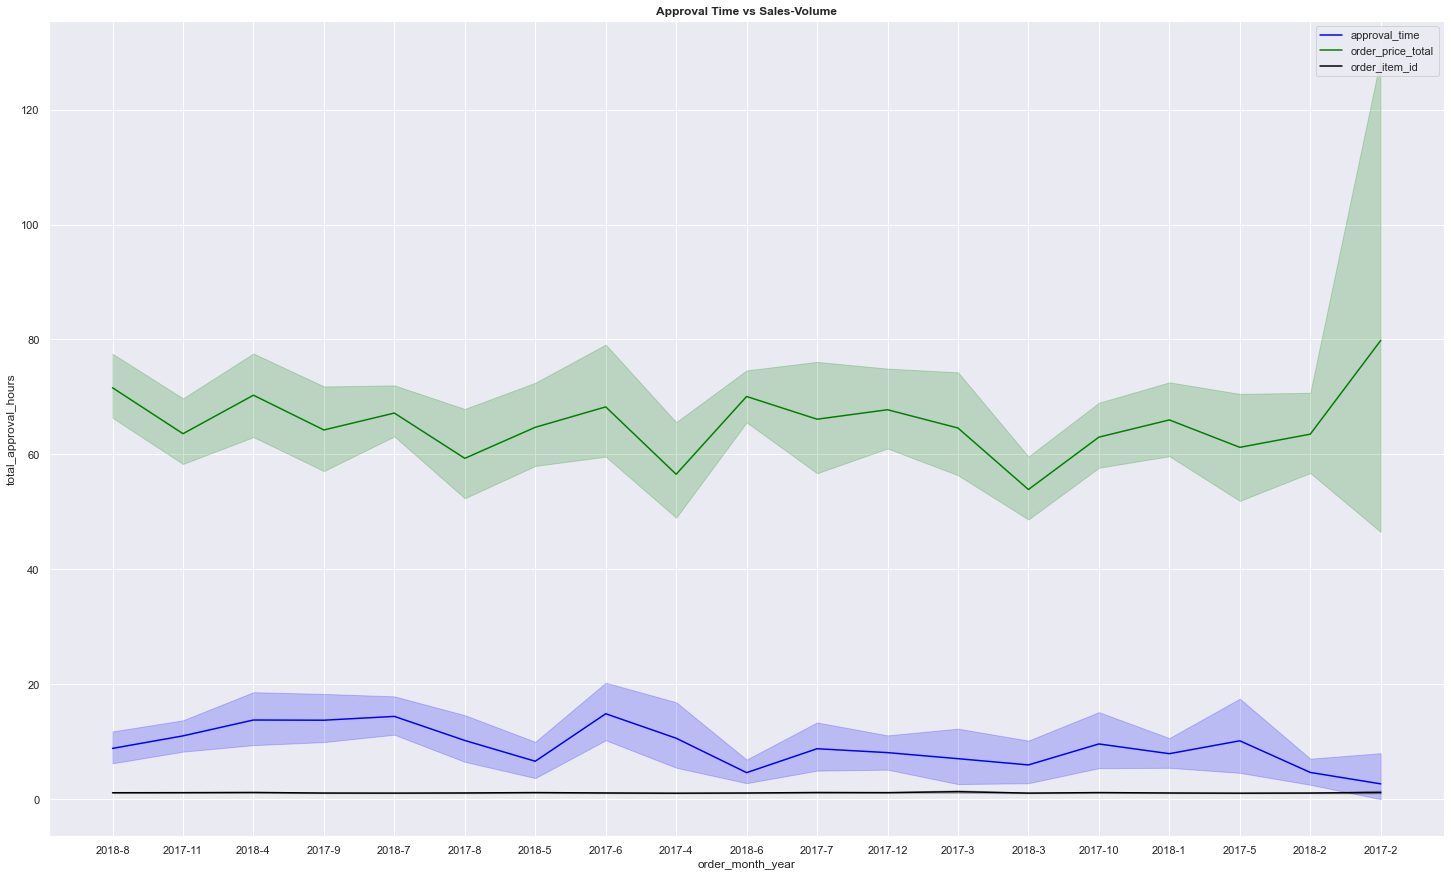

In [21]:
_t = df_selected_seller.merge(df_order_items[df_order_items['seller_id'] == _1seller_id])


plt.figure(figsize=(25,15))
s.lineplot(x='order_month_year',y='total_approval_hours', data=_t, label="approval_time", color="blue")

s.lineplot(x='order_month_year', y='order_price_total', data=_t, label="order_price_total", color="green")

s.lineplot(x='order_month_year', y='order_item_id', data=_t, label="order_item_id", color="black")

plt.title("Approval Time vs Sales-Volume",fontweight='bold')


In [22]:
# unique customers in any given month

_t = df_selected_seller.merge(df_order_items[df_order_items['seller_id'] == _1seller_id])

_t.total_approval_hours.describe()

count    2033.000000
mean     9.544515   
std      20.147295  
min      0.000000   
25%      0.000000   
50%      0.000000   
75%      12.000000  
max      265.000000 
Name: total_approval_hours, dtype: float64

In [23]:
# order items count, genr. overview

df_selected_seller.order_item_id.describe()

count    2033.000000
mean     1.112150   
std      0.387063   
min      1.000000   
25%      1.000000   
50%      1.000000   
75%      1.000000   
max      6.000000   
Name: order_item_id, dtype: float64

In [24]:
# order items count

_t = df_selected_seller.merge(df_order_items[df_order_items['seller_id'] == _1seller_id])

_t = _t.groupby(['order_month', 'order_year', 'seller_id'])['order_item_id'].mean().to_frame().reset_index()
_t.sort_values(by=['order_year', 'order_month'], ascending=True)



,order_month,order_year,seller_id,order_item_id
1,2,2017,6560211a19b47992c3666cc44a7e94c0,1.166667
3,3,2017,6560211a19b47992c3666cc44a7e94c0,1.305085
5,4,2017,6560211a19b47992c3666cc44a7e94c0,1.043478
7,5,2017,6560211a19b47992c3666cc44a7e94c0,1.046512
9,6,2017,6560211a19b47992c3666cc44a7e94c0,1.085714
11,7,2017,6560211a19b47992c3666cc44a7e94c0,1.160920
13,8,2017,6560211a19b47992c3666cc44a7e94c0,1.087912
15,9,2017,6560211a19b47992c3666cc44a7e94c0,1.072727
16,10,2017,6560211a19b47992c3666cc44a7e94c0,1.149123
17,11,2017,6560211a19b47992c3666cc44a7e94c0,1.137566


In [25]:
# difference between purhcase_time & approval_time

_t = df_selected_seller
_t['total_approval_hours'] = (pd.to_datetime(df_selected_seller.order_approved_at) - pd.to_datetime(df_selected_seller.order_purchase_timestamp)).astype('timedelta64[h]')

_t = df_selected_seller.groupby(['order_month', 'order_year', 'seller_id'])['total_approval_hours'].mean().to_frame().reset_index()
_t.sort_values(by=['order_year', 'order_month'], ascending=True)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,order_month,order_year,seller_id,total_approval_hours
1,2,2017,6560211a19b47992c3666cc44a7e94c0,2.666667
3,3,2017,6560211a19b47992c3666cc44a7e94c0,7.050847
5,4,2017,6560211a19b47992c3666cc44a7e94c0,10.608696
7,5,2017,6560211a19b47992c3666cc44a7e94c0,10.162791
9,6,2017,6560211a19b47992c3666cc44a7e94c0,14.871429
11,7,2017,6560211a19b47992c3666cc44a7e94c0,8.781609
13,8,2017,6560211a19b47992c3666cc44a7e94c0,10.219780
15,9,2017,6560211a19b47992c3666cc44a7e94c0,13.745455
16,10,2017,6560211a19b47992c3666cc44a7e94c0,9.614035
17,11,2017,6560211a19b47992c3666cc44a7e94c0,11.015873


### 2nd Top Seller

In [26]:
df_selected_seller = df_seller_orders[df_seller_orders['seller_id'] == _2seller_id]

df_selected_seller['order_year'] = pd.DatetimeIndex(df_selected_seller['order_approved_at']).year
df_selected_seller['order_month'] = pd.DatetimeIndex(df_selected_seller['order_approved_at']).month
df_selected_seller['order_month_year'] = df_selected_seller['order_year'].astype(str) + "-" + df_selected_seller['order_month'].astype(str)
df_selected_seller['total_approval_hours'] = (pd.to_datetime(df_selected_seller.order_approved_at) - pd.to_datetime(df_selected_seller.order_purchase_timestamp)).astype('timedelta64[h]')

# get total order price charged
df_selected_seller['order_price_total'] = df_selected_seller['order_item_id'] * df_selected_seller['price']

# average monthly GMV (Gross Merchandise Value)
second_seller_gmv_monthly = df_selected_seller.groupby(['order_month_year'])['order_price_total'].sum()
second_seller_gmv_annual = df_selected_seller.groupby(['order_year'])['order_price_total'].sum()

# avg monthly vs annual
print("monthly avg GMV", statistics.mean(second_seller_gmv_monthly.to_list()))
print("annual avg GMV", statistics.mean(second_seller_gmv_annual.to_list()))



second_seller_gmv_annual = second_seller_gmv_annual.to_frame().reset_index().append(
    {'order_year': 'predicted_avg(2019)', 'order_price_total':statistics.mean(second_seller_gmv_annual)},
    ignore_index=True)


second_seller_gmv_annual


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

monthly avg GMV 11343.586000000001
annual avg GMV 113435.86000000002


,order_year,order_price_total
0,2017,145243.27
1,2018,81628.45
2,predicted_avg(2019),113435.86


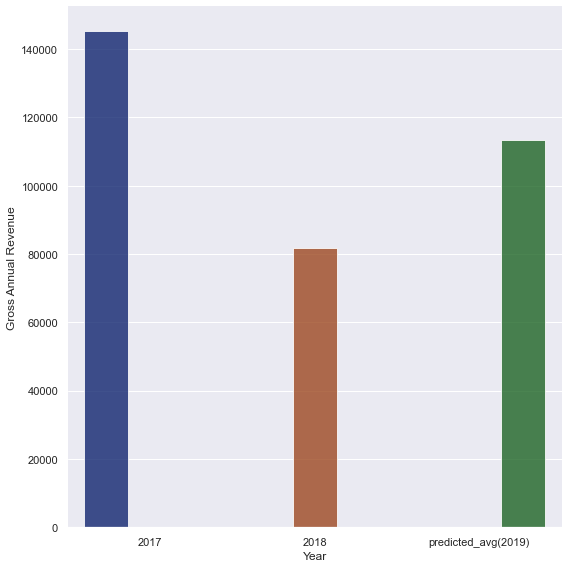

In [27]:
# Annual Revenue/ GMV

g = s.catplot(
    data=second_seller_gmv_annual, kind="bar",
    x="order_year", y="order_price_total", hue="order_year",
    ci="sd", palette="dark", alpha=.8, height=8,
    legend=False)

g.despine(left=True)
g.set_axis_labels("Year", "Gross Annual Revenue")



### Linear Regression -- Seller-2

coefficient of determination: 0.28405302191107884
intercept: 304346.59301126463
slope: [ 876.16805405 -147.71347523]
predicted response:
[ 7284.68153604  8160.84959009  9037.01764414  9913.1856982
 10789.35375225 11665.52180631 12541.68986036 13417.85791441
 14294.02596847 15170.19402252 16046.36207658 16922.53013063
  7136.96806081  8013.13611486  8889.30416892  9765.47222297
 10641.64027703 11517.80833108 12393.97638514 13270.14443919]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

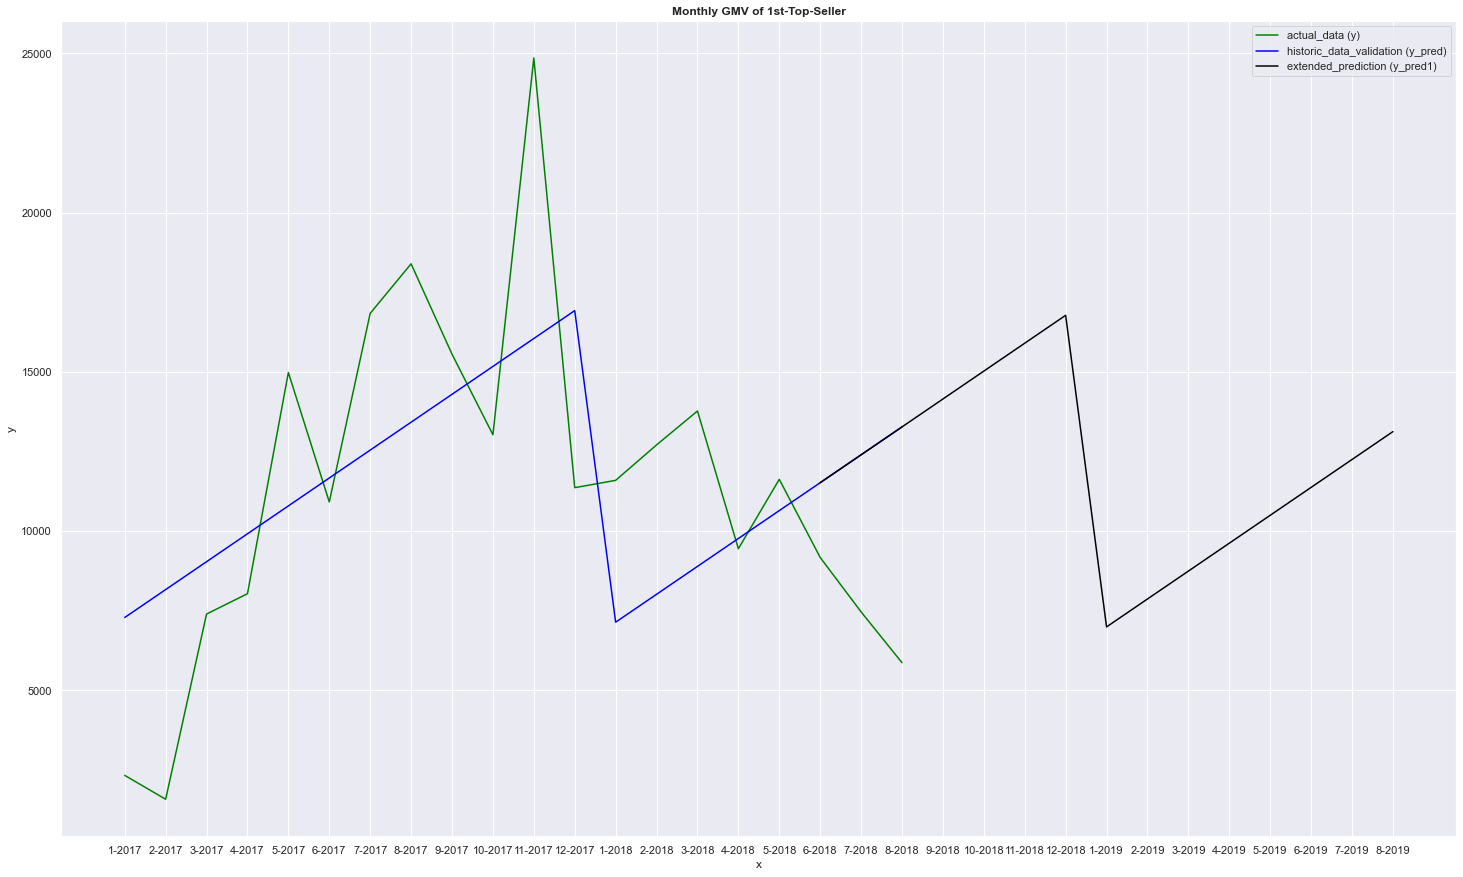

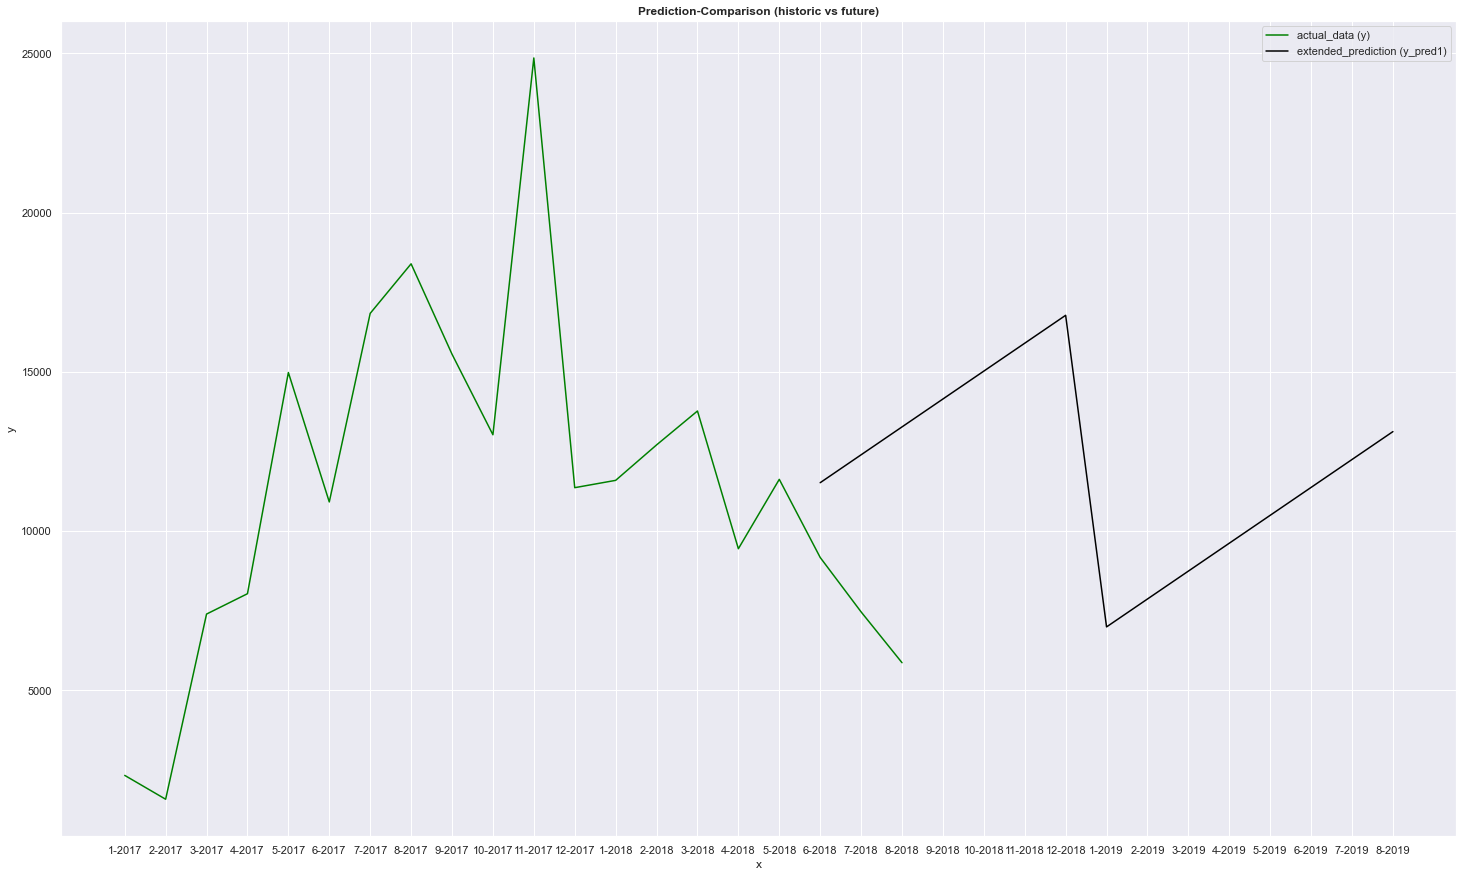

In [28]:
get_linear_regression_analysis(df_selected_seller)

### Gaussian Process Regression -- Seller-2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

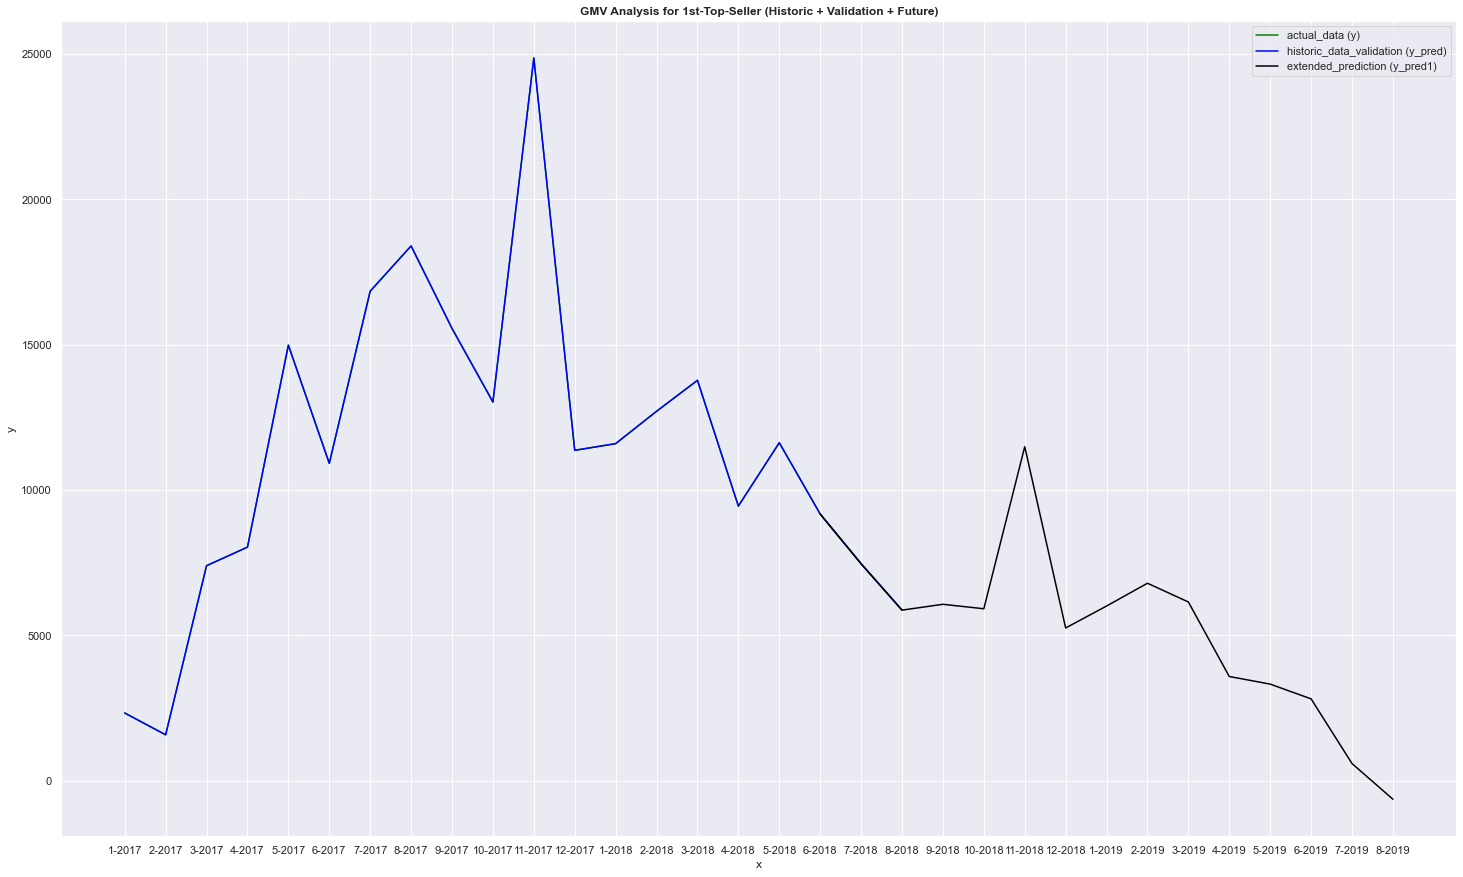

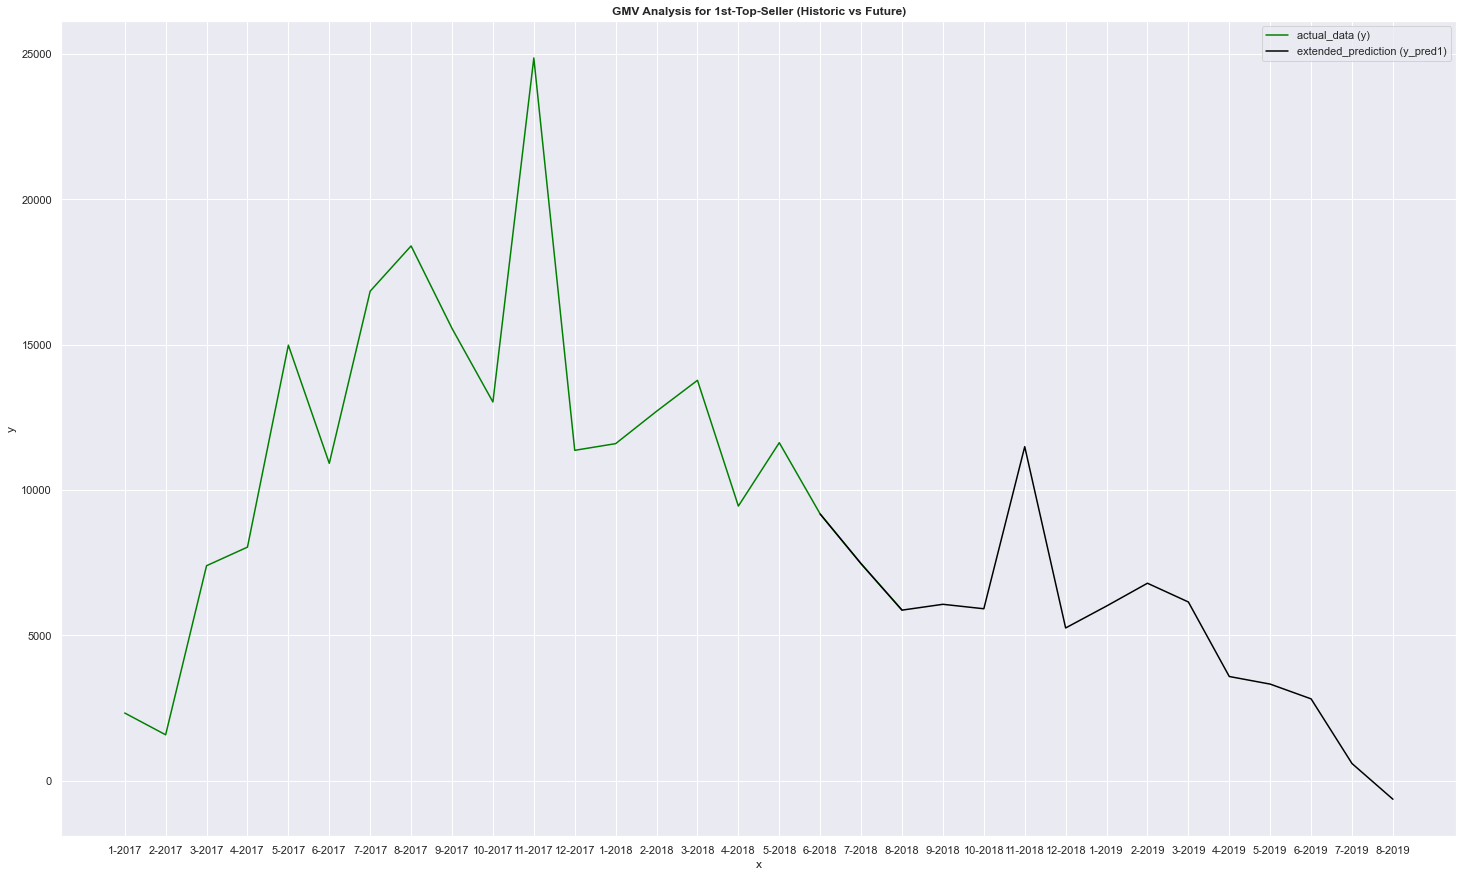

In [29]:
get_gaussian_process_regression_analysis(df_selected_seller)

In [30]:
# difference between purhcase_time & approval_time

_t = df_selected_seller
_t['total_approval_hours'] = (pd.to_datetime(df_selected_seller.order_approved_at) - pd.to_datetime(df_selected_seller.order_purchase_timestamp)).astype('timedelta64[h]')

_t = df_selected_seller.groupby(['order_month', 'order_year', 'seller_id'])['total_approval_hours'].mean().to_frame().reset_index()
_t.sort_values(by=['order_year', 'order_month'], ascending=True)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,order_month,order_year,seller_id,total_approval_hours
0,1,2017,4a3ca9315b744ce9f8e9374361493884,7.857143
2,2,2017,4a3ca9315b744ce9f8e9374361493884,3.000000
4,3,2017,4a3ca9315b744ce9f8e9374361493884,4.735294
6,4,2017,4a3ca9315b744ce9f8e9374361493884,13.860759
8,5,2017,4a3ca9315b744ce9f8e9374361493884,10.727941
10,6,2017,4a3ca9315b744ce9f8e9374361493884,6.970588
12,7,2017,4a3ca9315b744ce9f8e9374361493884,8.728571
14,8,2017,4a3ca9315b744ce9f8e9374361493884,10.240876
16,9,2017,4a3ca9315b744ce9f8e9374361493884,14.663866
17,10,2017,4a3ca9315b744ce9f8e9374361493884,7.669492


In [31]:
# order items count

_t = df_selected_seller.merge(df_order_items[df_order_items['seller_id'] == _2seller_id])

_t = _t.groupby(['order_month', 'order_year', 'seller_id'])['order_item_id'].mean().to_frame().reset_index()
_t.sort_values(by=['order_year', 'order_month'], ascending=True)



,order_month,order_year,seller_id,order_item_id
0,1,2017,4a3ca9315b744ce9f8e9374361493884,1.071429
2,2,2017,4a3ca9315b744ce9f8e9374361493884,1.083333
4,3,2017,4a3ca9315b744ce9f8e9374361493884,1.117647
6,4,2017,4a3ca9315b744ce9f8e9374361493884,1.126582
8,5,2017,4a3ca9315b744ce9f8e9374361493884,1.110294
10,6,2017,4a3ca9315b744ce9f8e9374361493884,1.088235
12,7,2017,4a3ca9315b744ce9f8e9374361493884,1.135714
14,8,2017,4a3ca9315b744ce9f8e9374361493884,1.204380
16,9,2017,4a3ca9315b744ce9f8e9374361493884,1.235294
17,10,2017,4a3ca9315b744ce9f8e9374361493884,1.067797


In [32]:
# order items count, genr. overview

df_selected_seller.order_item_id.describe()

count    1987.000000
mean     1.141922   
std      0.437411   
min      1.000000   
25%      1.000000   
50%      1.000000   
75%      1.000000   
max      5.000000   
Name: order_item_id, dtype: float64

In [33]:
# unique customers in any given month

_t = df_selected_seller.merge(df_order_items[df_order_items['seller_id'] == _2seller_id])
_t = _t.groupby(['order_month', 'order_year'])['customer_id'].nunique().to_frame().reset_index()
_t.sort_values(by=['order_year', 'order_month'], ascending=True)


,order_month,order_year,customer_id
0,1,2017,26
2,2,2017,11
4,3,2017,62
6,4,2017,71
8,5,2017,123
10,6,2017,96
12,7,2017,129
14,8,2017,119
16,9,2017,104
17,10,2017,114


### 3rd Top Seller

In [35]:
df_selected_seller = df_seller_orders[df_seller_orders['seller_id'] == _3seller_id]

df_selected_seller['order_year'] = pd.DatetimeIndex(df_selected_seller['order_approved_at']).year
df_selected_seller['order_month'] = pd.DatetimeIndex(df_selected_seller['order_approved_at']).month
df_selected_seller['order_month_year'] = df_selected_seller['order_year'].astype(str) + "-" + df_selected_seller['order_month'].astype(str)
df_selected_seller['total_approval_hours'] = (pd.to_datetime(df_selected_seller.order_approved_at) - pd.to_datetime(df_selected_seller.order_purchase_timestamp)).astype('timedelta64[h]')

# get total order price charged
df_selected_seller['order_price_total'] = df_selected_seller['order_item_id'] * df_selected_seller['price']

# average monthly GMV (Gross Merchandise Value)
third_seller_gmv_monthly = df_selected_seller.groupby(['order_month_year'])['order_price_total'].sum()
third_seller_gmv_annual = df_selected_seller.groupby(['order_year'])['order_price_total'].sum()

# avg monthly vs annual
print("monthly avg GMV", statistics.mean(third_seller_gmv_monthly.to_list()))
print("annual avg GMV", statistics.mean(third_seller_gmv_annual.to_list()))


third_seller_gmv_annual = third_seller_gmv_annual.to_frame().reset_index().append(
    {'order_year': 'predicted_avg(2019)', 'order_price_total':statistics.mean(third_seller_gmv_annual)},
    ignore_index=True)


third_seller_gmv_annual



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

monthly avg GMV 9553.802941176471
annual avg GMV 81207.325


,order_year,order_price_total
0,2017,90770.190
1,2018,71644.460
2,predicted_avg(2019),81207.325


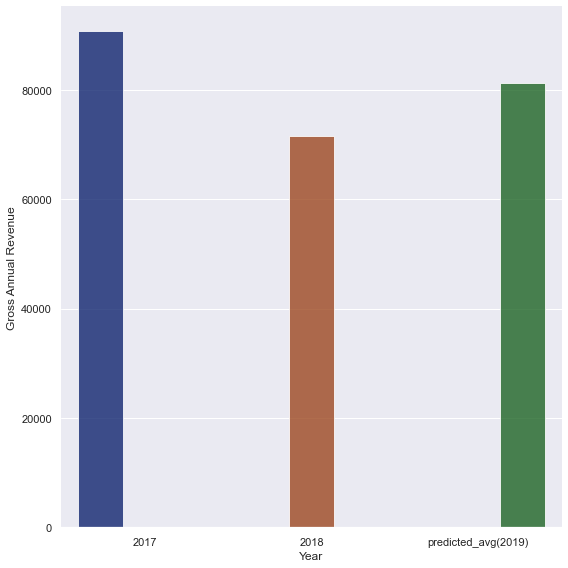

In [38]:
# Annual Revenue/ GMV

g = s.catplot(
    data=third_seller_gmv_annual, kind="bar",
    x="order_year", y="order_price_total", hue="order_year",
    ci="sd", palette="dark", alpha=.8, height=8,
    legend=False)

g.despine(left=True)
g.set_axis_labels("Year", "Gross Annual Revenue")


### Linear Regression -- Seller-3

coefficient of determination: 0.20681311894349308
intercept: -6626283.062450984
slope: [1261.49519608 3285.21401961]
predicted response:
[ 5039.59588235  6301.09107843  7562.58627451  8824.08147059
 10085.57666667 11347.07186274 12608.56705882 13870.0622549
 15131.55745098  4540.32431373  5801.8195098   7063.31470588
  8324.80990196  9586.30509804 10847.80029412 12109.2954902
 13370.79068627]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

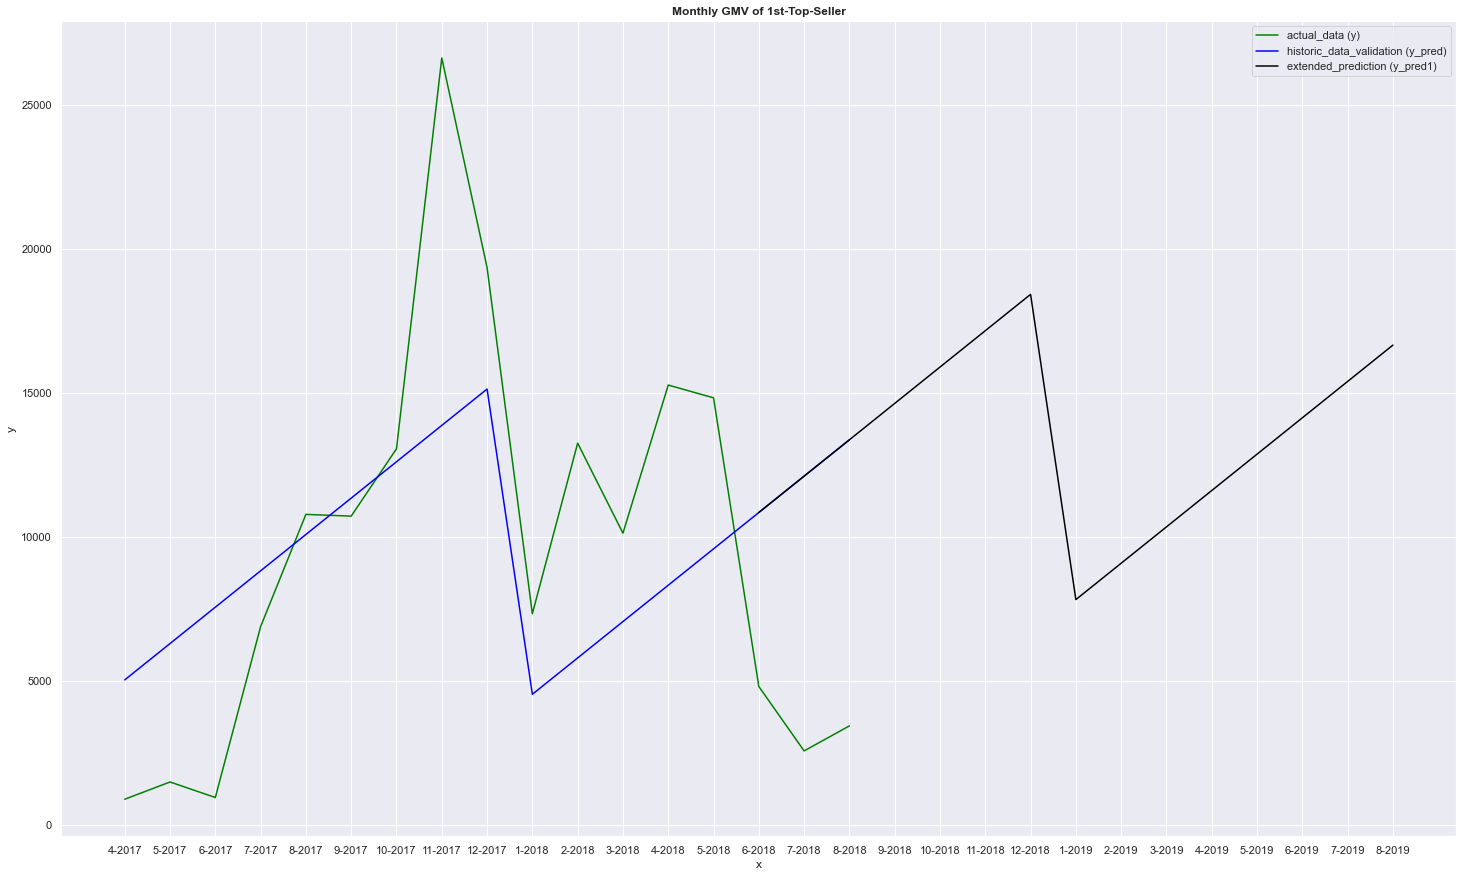

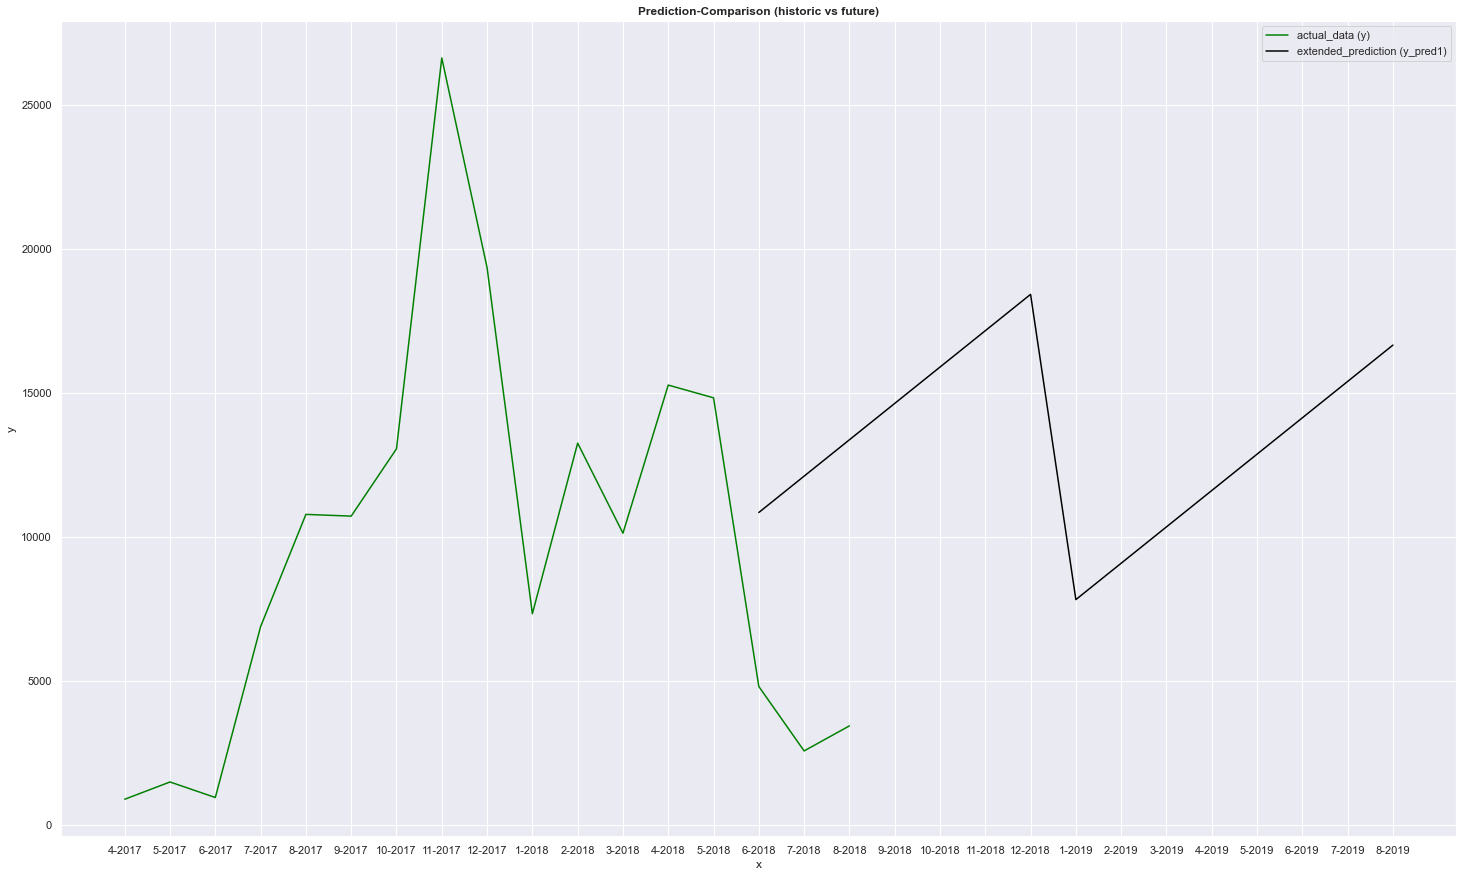

In [39]:
get_linear_regression_analysis(df_selected_seller)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

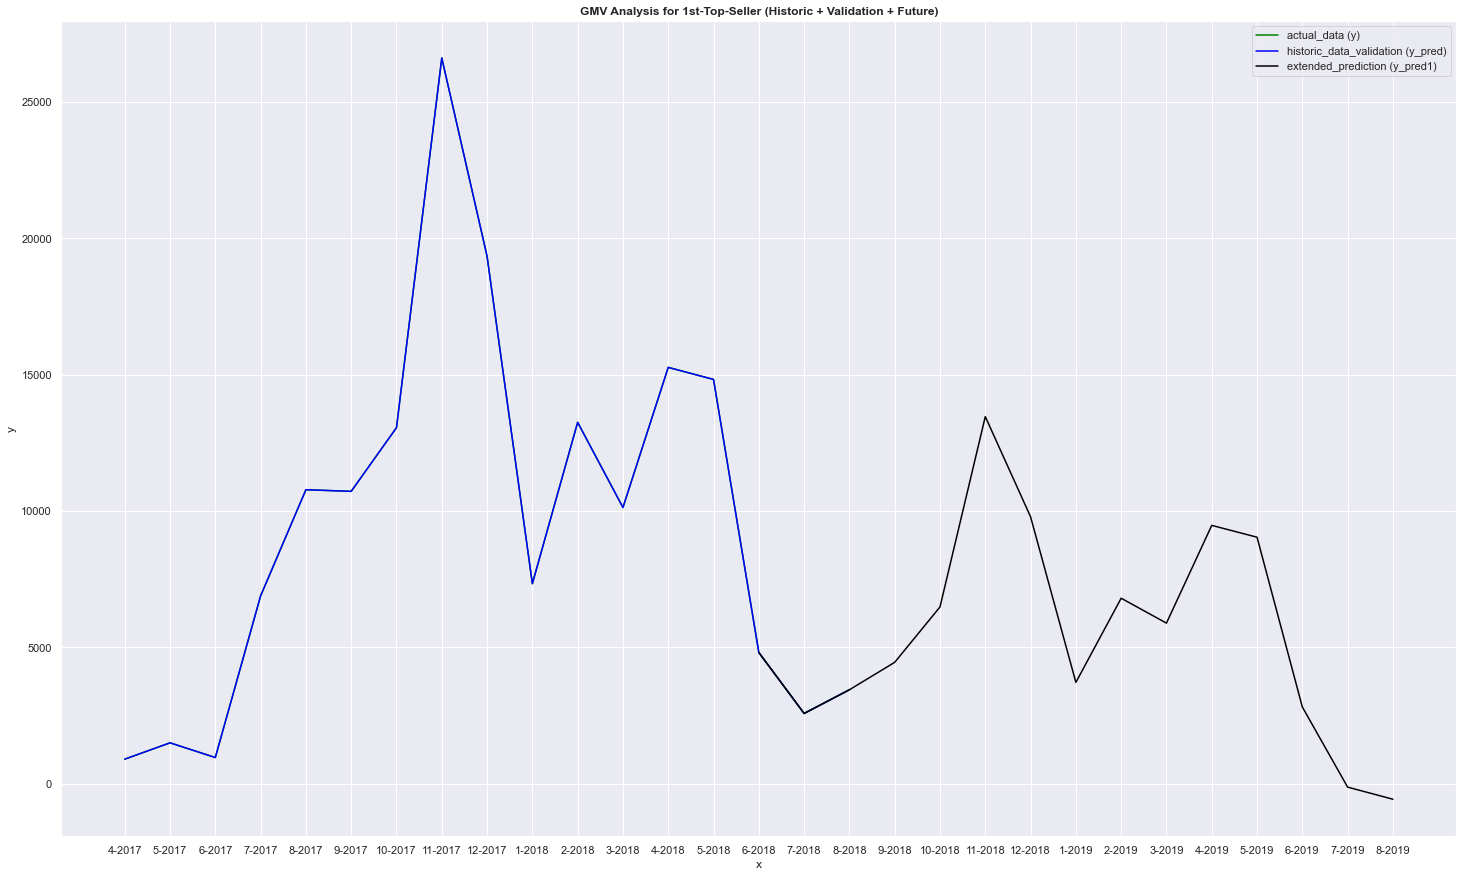

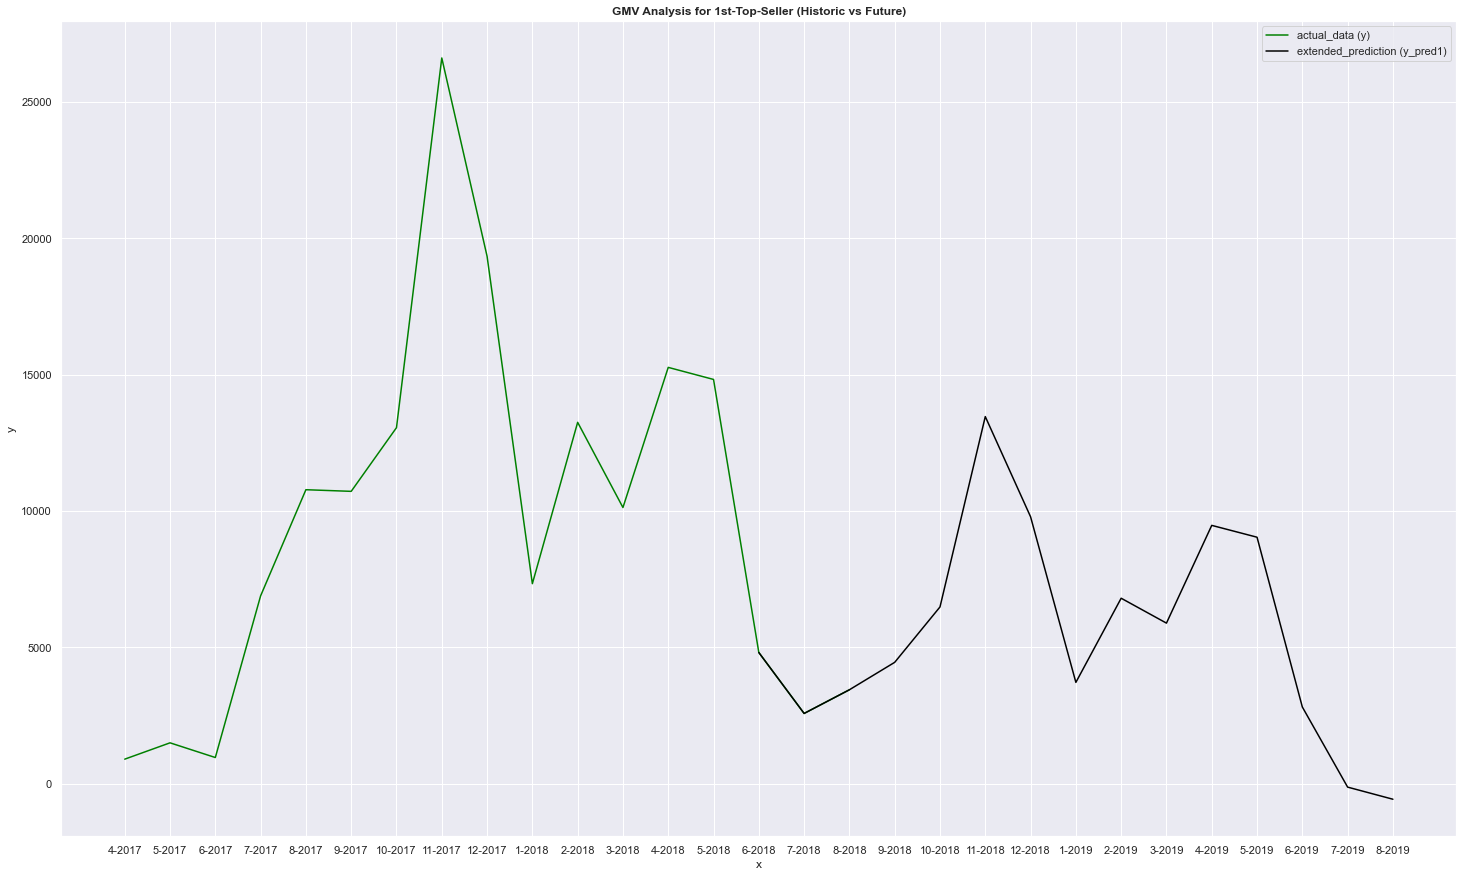

In [40]:
get_gaussian_process_regression_analysis(df_selected_seller)

In [41]:
# order items count

_t = df_selected_seller.merge(df_order_items[df_order_items['seller_id'] == _3seller_id])

_t = _t.groupby(['order_month', 'order_year', 'seller_id'])['order_item_id'].mean().to_frame().reset_index()
_t.sort_values(by=['order_year', 'order_month'], ascending=True)


,order_month,order_year,seller_id,order_item_id
3,4,2017,1f50f920176fa81dab994f9023523100,1.666667
5,5,2017,1f50f920176fa81dab994f9023523100,1.470588
7,6,2017,1f50f920176fa81dab994f9023523100,1.230769
9,7,2017,1f50f920176fa81dab994f9023523100,1.385542
11,8,2017,1f50f920176fa81dab994f9023523100,1.333333
13,9,2017,1f50f920176fa81dab994f9023523100,1.387597
14,10,2017,1f50f920176fa81dab994f9023523100,1.453333
15,11,2017,1f50f920176fa81dab994f9023523100,1.399433
16,12,2017,1f50f920176fa81dab994f9023523100,1.904494
0,1,2018,1f50f920176fa81dab994f9023523100,1.245763


In [42]:
# difference between purhcase_time & approval_time

_t = df_selected_seller
_t['total_approval_hours'] = (pd.to_datetime(df_selected_seller.order_approved_at) - pd.to_datetime(df_selected_seller.order_purchase_timestamp)).astype('timedelta64[h]')

_t = df_selected_seller.groupby(['order_month', 'order_year', 'seller_id'])['total_approval_hours'].mean().to_frame().reset_index()
_t.sort_values(by=['order_year', 'order_month'], ascending=True)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,order_month,order_year,seller_id,total_approval_hours
3,4,2017,1f50f920176fa81dab994f9023523100,9.777778
5,5,2017,1f50f920176fa81dab994f9023523100,28.117647
7,6,2017,1f50f920176fa81dab994f9023523100,7.307692
9,7,2017,1f50f920176fa81dab994f9023523100,7.518072
11,8,2017,1f50f920176fa81dab994f9023523100,10.185185
13,9,2017,1f50f920176fa81dab994f9023523100,12.286822
14,10,2017,1f50f920176fa81dab994f9023523100,8.846667
15,11,2017,1f50f920176fa81dab994f9023523100,13.903683
16,12,2017,1f50f920176fa81dab994f9023523100,11.730337
0,1,2018,1f50f920176fa81dab994f9023523100,16.118644


In [43]:
# unique customers in any given month

_t = df_selected_seller.merge(df_order_items[df_order_items['seller_id'] == _3seller_id])
_t = _t.groupby(['order_month', 'order_year'])['customer_id'].nunique().to_frame().reset_index()
_t.sort_values(by=['order_year', 'order_month'], ascending=True)


,order_month,order_year,customer_id
3,4,2017,6
5,5,2017,11
7,6,2017,10
9,7,2017,62
11,8,2017,105
13,9,2017,96
14,10,2017,103
15,11,2017,267
16,12,2017,121
0,1,2018,98


Text(0.5, 1.0, 'Gross Merchandise Value (GMV) of Top 3 Sellers')

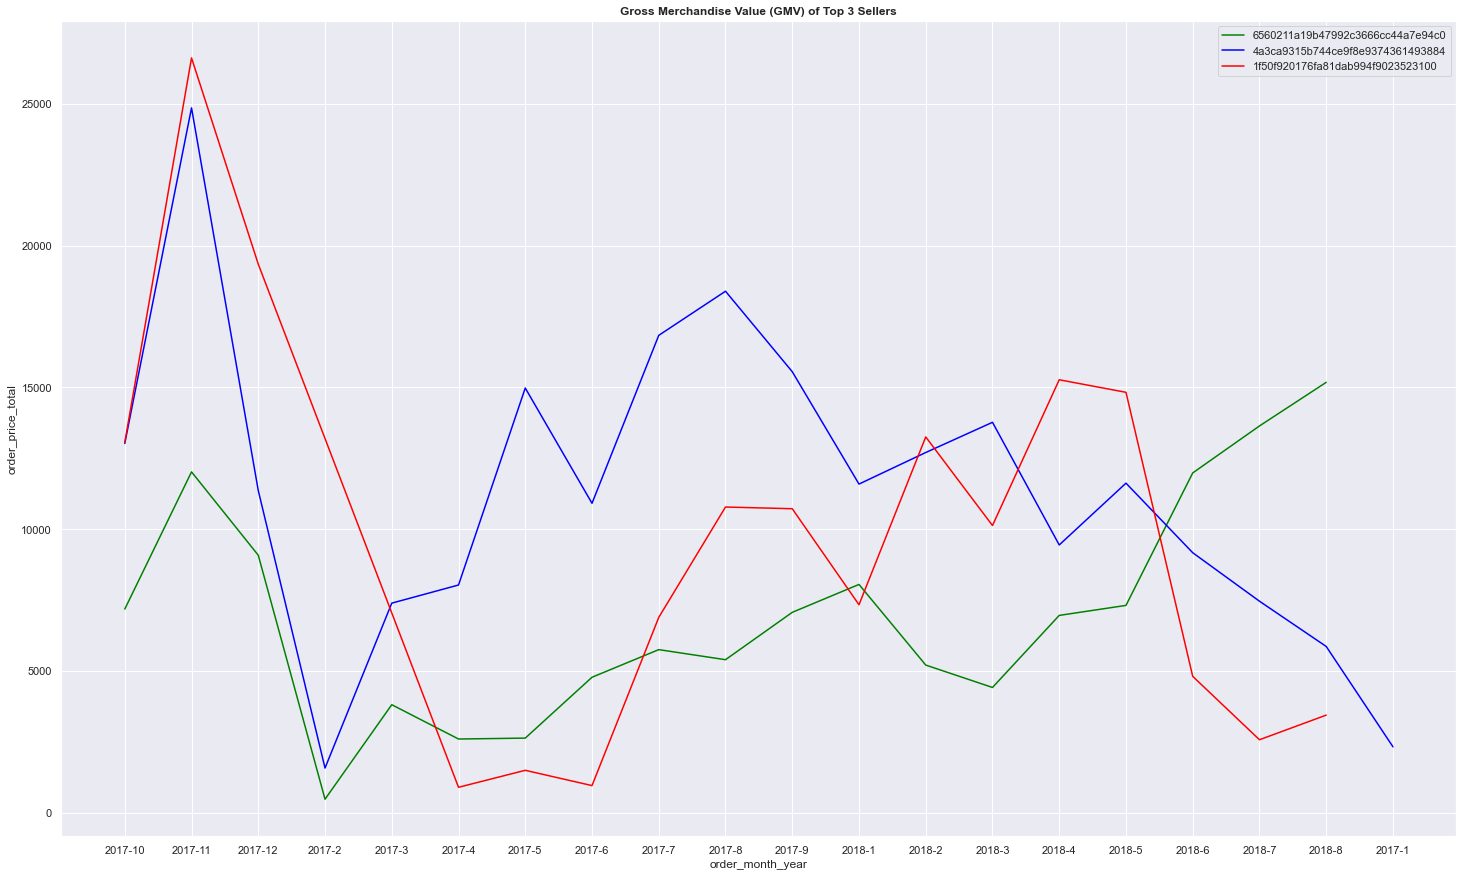

In [46]:
# Monthly Revenue, all 3

df1 = first_seller_gmv_monthly.to_frame().reset_index()
df2 = second_seller_gmv_monthly.to_frame().reset_index()
df3 =third_seller_gmv_monthly.to_frame().reset_index()


plt.figure(figsize=(25,15))

s.lineplot(x='order_month_year',y='order_price_total',
           data=df1, label=_1seller_id, color="green")

s.lineplot(x='order_month_year', y='order_price_total', 
           data=df2, label=_2seller_id, color="blue")

s.lineplot(x='order_month_year', y='order_price_total',
           data=df3, label=_3seller_id, color="red")



plt.title("Gross Merchandise Value (GMV) of Top 3 Sellers",fontweight='bold')